# Konvolucijske mreže

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms


In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data', train= True, download= True, transform = transforms.ToTensor())

In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 8, shuffle= True)

In [7]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [9]:
testset = torchvision.datasets.CIFAR10(root='./data', train= False, download= True, transform = transforms.ToTensor())

Files already downloaded and verified


In [10]:
testloader = torch.utils.data.DataLoader(testset, batch_size = 8, shuffle= False)

In [12]:
images_batch, labels_batch = iter(trainloader).next()

In [14]:
images_batch.shape, labels_batch.shape

In [17]:
img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 36, 274])

In [18]:
import matplotlib.pyplot as plt
import numpy as np

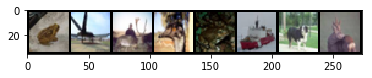

In [19]:
plt.imshow(np.transpose(img, (1,2,0)))

In [20]:
import torch.nn as nn

In [27]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels= 3, out_channels=16, kernel_size=5 , stride=1, padding=2), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size= 2))
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels= 16, out_channels=32, kernel_size=5 , stride=1, padding=2), 
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size= 2))
        self.fullyConnectedLayer = nn.Linear(8*8*32, 10)
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        #moramo linearizirati
        x = x.reshape(x.size(0), -1)
        x = self.fullyConnectedLayer(x)
            
        return x

In [28]:
model = ConvNet()

In [29]:
loss_fn = nn.CrossEntropyLoss()

In [30]:
optimizer = torch.optim.Adam(model.parameters(), 1e-3)

In [31]:
for iter in range(1, 3):
    for i, (images, labels) in enumerate(trainloader):
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i%500 == 0:
            print(" iter = ", iter)
            print("i = ", i)
            print("loss = ", loss.item())

 iter =  1
i =  0
loss =  2.3035192489624023
 iter =  1
i =  500
loss =  1.6784706115722656
 iter =  1
i =  1000
loss =  2.4303112030029297
 iter =  1
i =  1500
loss =  1.064211368560791
 iter =  1
i =  2000
loss =  1.9634524583816528
 iter =  1
i =  2500
loss =  1.7290616035461426
 iter =  1
i =  3000
loss =  1.3295506238937378
 iter =  1
i =  3500
loss =  1.6133441925048828
 iter =  1
i =  4000
loss =  1.3504092693328857
 iter =  1
i =  4500
loss =  1.14358651638031
 iter =  1
i =  5000
loss =  0.9224969148635864
 iter =  1
i =  5500
loss =  0.7717543244361877
 iter =  1
i =  6000
loss =  0.4897995889186859
 iter =  2
i =  0
loss =  1.1357733011245728
 iter =  2
i =  500
loss =  1.283362865447998
 iter =  2
i =  1000
loss =  1.1441386938095093
 iter =  2
i =  1500
loss =  1.24565589427948
 iter =  2
i =  2000
loss =  0.5232040882110596
 iter =  2
i =  2500
loss =  0.570939302444458
 iter =  2
i =  3000
loss =  0.6723921298980713
 iter =  2
i =  3500
loss =  1.3861364126205444
 iter =

In [33]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted== labels).sum().item()
        
    print("Model accuracy:", 100*correct/total )

Model accuracy: 64.58
